In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import skimage as ski
import bm3d
from optics import grating, normalize, square_lowpass, circle_lowpass
from noise import gauss_noise, poisson_noise, salt_pepper_noise, random_noise

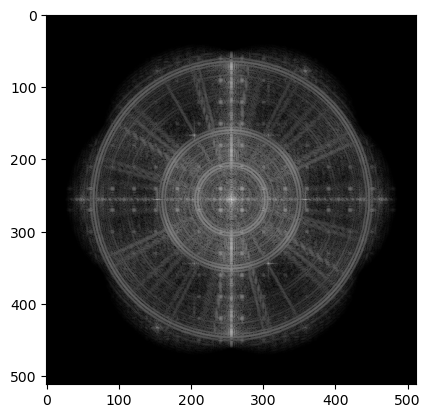

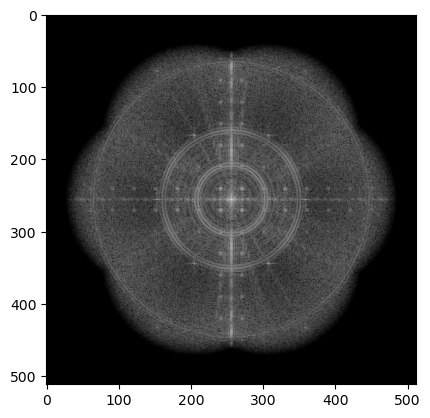

In [3]:
reconstructed = ski.io.imread('source_images/synthetic_grated_256_reconstructed.tif')
filtered_reconstructed = ski.io.imread('source_images/bm3d_synthetic_grated_256_reconstructed.tif')

plt.set_cmap('gray')

ft = np.fft.fftshift(np.fft.fft2(reconstructed[:, :, 0]))
plt.imshow(np.log(np.abs(ft)+1))
plt.show()
ft = np.fft.fftshift(np.fft.fft2(filtered_reconstructed[:, :, 0]))
plt.imshow(np.log(np.abs(ft)+1))
plt.show()